In [66]:
import numpy as np
import os
from sklearn.metrics import mean_squared_error
import h5py
from spectral import *
from util.metrics import psnr, mape, ssim

In [1]:
# path to HSI of ICVL BGU (resized & augmented) : /data/dehazing/Codes/HSICycle/datasets/d1/trainB 
# path to HSI of ICVL BGU original (resized) : /data/dehazing/Codes/CycleGAN/datasets/D1/trainB
# path to RGB of ICVL BGU : /data/dehazing/Codes/CycleGAN/datasets/RGB_DATA/
!ls /data1/Datasets/BGU 

4cam_0411-1640-1.hdf5		     nachal_0823-1149.hdf5
4cam_0411-1648.hdf5		     nachal_0823-1152.hdf5
BGU_0403-1419-1.hdf5		     nachal_0823-1210-4.hdf5
bgu_0403-1439.hdf5		     nachal_0823-1213.hdf5
bgu_0403-1444.hdf5		     nachal_0823-1214.hdf5
bgu_0403-1459.hdf5		     nachal_0823-1217.hdf5
bgu_0403-1511.hdf5		     nachal_0823-1220.hdf5
bgu_0403-1523.hdf5		     nachal_0823-1222.hdf5
bgu_0403-1525.hdf5		     nachal_0823-1223.hdf5
BGU_0522-1113-1.hdf5		     negev_0823-1003.hdf5
BGU_0522-1127.hdf5		     negev_0823-1005.hdf5
BGU_0522-1136.hdf5		     objects_0924-1550.hdf5
BGU_0522-1201.hdf5		     objects_0924-1556.hdf5
BGU_0522-1203.hdf5		     objects_0924-1557.hdf5
BGU_0522-1211.hdf5		     objects_0924-1558.hdf5
BGU_0522-1216.hdf5		     objects_0924-1600.hdf5
BGU_0522-1217.hdf5		     objects_0924-1601.hdf5
bguCAMP_0514-1659.hdf5		     objects_0924-1602.hdf5
bguCAMP_0514-1711.hdf5		     objects_0924-1605.hdf5
bguCAMP_0514-1712.hdf5		     objects_0924-1607.hdf5
bguCAMP_0514-1718.hdf5		     ob

In [2]:
input_dir_rgb = '/data/dehazing/Codes/CycleGAN/datasets/RGB_DATA/'
input_dir_hsi = '/data/dehazing/Codes/CycleGAN/datasets/D1/trainB/'
output_dir = '/data/dehazing/Codes/DC_SS_HSICycle/results/ICVL_BGU/'

In [38]:
!python test.py --dataroot /data/dehazing/Codes/CycleGAN/datasets/RGB_DATA/  --results_dir ICVL_BGU --name 4hsi_vanilla_version2 --model test --no_dropout --gpu_ids 0 --ndf 64 --ngf 64 --netG unet_256 --netD unet_256 --Apath AB

----------------- Options ---------------
                    Apath: AB                            	[default: A]
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /data/dehazing/Codes/CycleGAN/datasets/RGB_DATA/	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
             input_nc_hsi: 31            

In [51]:
def hsi_normalize(data, max_=4096, denormalize=False):
    """
    Using the ICVL BGU dataset, the max and min values were computed. 
    Normalizing to 0-1
    """
    HSI_MAX = max_
    HSI_MIN = 0

    NEW_MAX = 1
    NEW_MIN = 0
    if(denormalize):
        scaled = (data - NEW_MIN) * (HSI_MAX - HSI_MIN)/(NEW_MAX - NEW_MIN) + HSI_MIN 
        return scaled.astype(np.float32)
    scaled  = (data - HSI_MIN) * (NEW_MAX - NEW_MIN)/(HSI_MAX - HSI_MIN)  + NEW_MIN
    return scaled.astype(np.float32)

In [67]:
epoch = 'latest'
folder = '4hsi_out_vanilla_version2' #MSE : 636312.3743227092
folder = '4hsi_vanilla_version2' 
DIR = './ICVL_BGU/{0}/test_{1}/images/'.format(folder, epoch)
files = os.listdir(DIR)
files_gt = os.listdir(input_dir_hsi)
fake_B_files = sorted([os.path.join(DIR, f) for f in files if f.endswith('fake.hdf5')])
real_A_files = sorted([os.path.join(DIR, f) for f in files if f.endswith('real.hdf5')])
# real_B_files = sorted([os.path.join(input_dir_hsi,f) for f in files_gt if f.endswith('.hdf5')])

mse = []
ssim_values = []
j = 1
# print(len(fake_B_files))
# print(len(real_B_files))
for i,_ in enumerate(fake_B_files):
    gen_x_name = fake_B_files[i]
    org_x_name = input_dir_hsi + gen_x_name.split('/')[-1][:-10]+'.hdf5'
    with h5py.File(gen_x_name, 'r') as f:
        gen_x = hsi_normalize(np.array(f['data'])[:,:,::-1])
    try:
        with h5py.File(org_x_name, 'r') as f:
#         print(list(f.keys()))
            org_x = hsi_normalize(np.array(f['hs_data'])[:,:,::-1])
    except:
        print(org_x_name)
        continue
#     print(np.max(gen_x))
#     print(np.max(org_x))
#     print(np.min(gen_x))
#     print(np.min(org_x))
    ssim_values.append(ssim(org_x, gen_x))
    mse.append(((gen_x-org_x)**2).mean())
#     print(m.shape)
#     print(m)
#     break
    print(j)
    j +=1


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
/data/dehazing/Codes/CycleGAN/datasets/D1/trainB/lehavim_0910-1605.hdf5
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [70]:
np.mean(np.sqrt(mse))

0.23855388

In [71]:
np.mean(ssim_values)

0.5974360269825856

ImageView object:
  Display bands       :  [0, 15.5, 30]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.9687569737434387]
    G: [0.0, 0.940826416015625]
    B: [0.0, 0.8756674528121948]

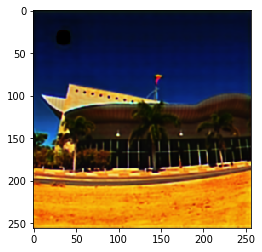

In [54]:
imshow(gen_x)

ImageView object:
  Display bands       :  [0, 15.5, 30]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.05765894800424576, 0.5419917106628418]
    G: [0.05780360847711563, 0.5472152233123779]
    B: [0.04925999417901039, 0.08685030043125153]

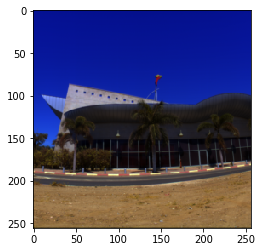

In [55]:
imshow(org_x)

In [49]:
org_x.shape

(256, 256, 31)

In [63]:
error = org_x-gen_x

ImageView object:
  Display bands       :  [0, 15.5, 30]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.6684949994087219, 0.09082870185375214]
    G: [-0.6480323076248169, 0.1286890208721161]
    B: [-0.7925603985786438, 0.07178360968828201]

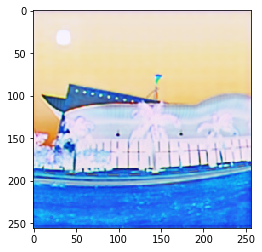

In [64]:
imshow(error)